In [ ]:
#The code you provided is used to mount your Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# read the csv file
df = pd.read_csv('/content/drive/MyDrive/YHills/TaxiFare.csv')

In [ ]:
#display the first 5 data value
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# it is used to display concise information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
# calculates the number of missing values (NaN or null values) in each column
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
# it checks whether there are any zero values present or not in dataframe
are_zeros_present = (df == 0.0).any().any()
print("Are there any 0 values in the DataFrame? --> ", are_zeros_present)

Are there any 0 values in the DataFrame? -->  True


In [ ]:
# it replaces all occurrences of the value 0.0 in the dataset
df.replace(0.0, np.nan, inplace=True)

In [ ]:
# it drops any rows with missing values (NaN) from the dataset
df = df.dropna()

In [ ]:
# it is used to obtain the shape of dataset
df.shape

(48838, 8)

In [ ]:
# it drops the column name "unique_id"
df = df.drop('unique_id', axis=1)

In [ ]:
df.shape

(48838, 7)

In [ ]:
# it drops rows from the DataFrame where the value in the 'amount' column is less than or equal to 0.
rows_to_drop = df[(df['amount'] <= 0)]
df = df.drop(rows_to_drop.index)

In [ ]:
# it generates a summary statistics table for dataset
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48833.000000,48833.000000,48833.000000,48833.000000,48833.000000,48833.000000
mean,11.368581,-73.927474,40.711185,-73.920731,40.703498,1.674790
std,9.664527,2.311875,2.807166,2.399948,2.293225,1.288864
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992302,40.736471,-73.991327,40.735867,1.000000
50%,8.500000,-73.982116,40.753418,-73.980475,40.754093,1.000000
75%,12.500000,-73.968350,40.767762,-73.965287,40.768473,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
#  converts a string column representing datetime in a DataFrame to a proper datetime format and then extracts the year, weekday, and hour from that datetime.
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")
df['year'] = df.date_time_of_pickup.apply(lambda t: t.year)
df['weekday'] = df.date_time_of_pickup.apply(lambda t: t.weekday())
df['hour'] = df.date_time_of_pickup.apply(lambda t: t.hour)

In [ ]:
# creating three new columns for each extracted component from "date_time_of_pickup"
df  = df.loc[:, ['amount', 'no_of_passenger', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'year','weekday','hour']]

In [ ]:
# display first 5 data value rows
df.head()

,amount,no_of_passenger,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,year,weekday,hour
0,4.5,1.0,-73.844311,40.721319,-73.841610,40.712278,2009,0,17
1,16.9,1.0,-74.016048,40.711303,-73.979268,40.782004,2010,1,16
2,5.7,2.0,-73.982738,40.761270,-73.991242,40.750562,2011,3,0
3,7.7,1.0,-73.987130,40.733143,-73.991567,40.758092,2012,5,4
4,5.3,1.0,-73.968095,40.768008,-73.956655,40.783762,2010,1,7


In [ ]:
# display unique values from the "year" column
unique_years = df['year'].unique()
print(unique_years)

[2009 2010 2011 2012 2013 2014 2015]


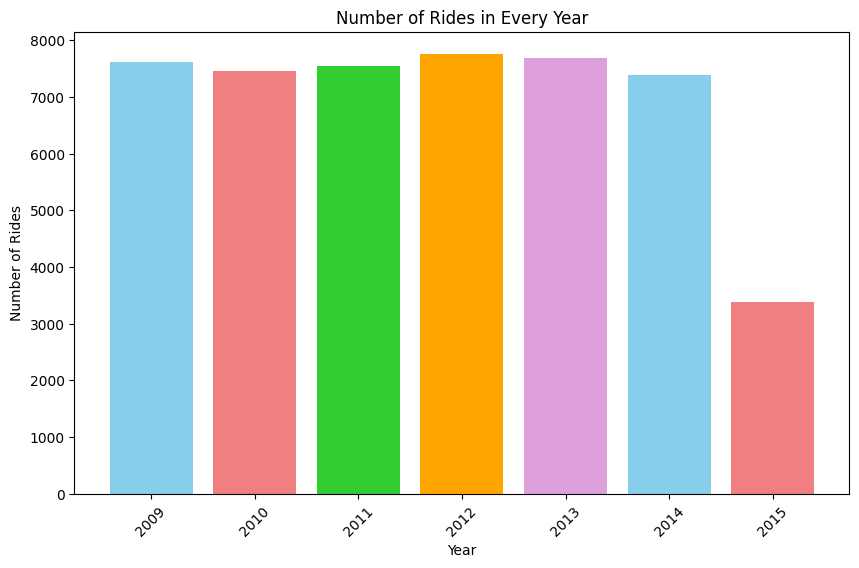

In [ ]:
# bar chart that shows the number of rides in every year
rides_per_year = df['year'].value_counts()
rides_per_year = rides_per_year.sort_index()
colors = ['skyblue', 'lightcoral', 'limegreen', 'orange', 'plum']
plt.figure(figsize=(10, 6))
plt.bar(rides_per_year.index, rides_per_year.values,color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.title('Number of Rides in Every Year')
plt.xticks(rotation=45)
plt.show()

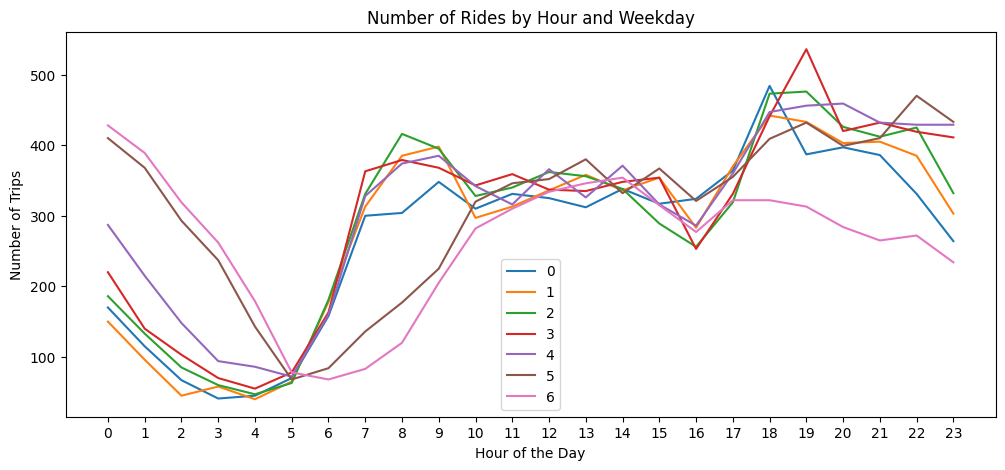

In [ ]:
# Create a pivot table to count the number of rides by hour and weekday
data = pd.pivot_table(df, values='amount', index='hour', columns='weekday', aggfunc='count')
plt.rcParams['figure.figsize'] = (12, 5)
ax = data.plot(kind='line')
ax.set_title('Number of Rides by Hour and Weekday')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Trips')
ax.set_xticks(np.arange(0, 24, 1))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
handles, labels = ax.get_legend_handles_labels()
filtered_labels = [label for label in labels if label in order]
ax.legend(handles=[handles[labels.index(label)] for label in filtered_labels], labels=filtered_labels)
plt.show()

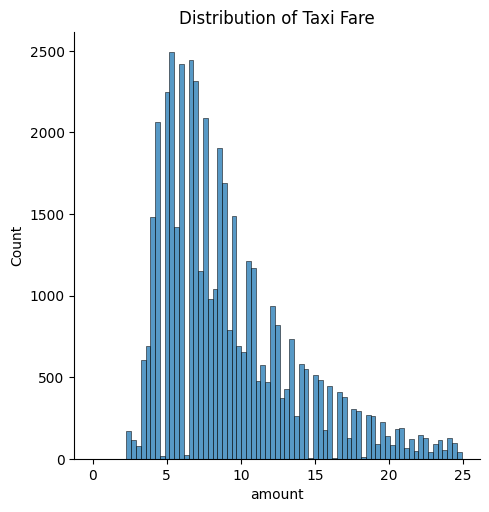

In [ ]:
# Distribution of trip fare
sns.displot(df[df['amount']<25]['amount'])
plt.title('Distribution of Taxi Fare')
plt.show()

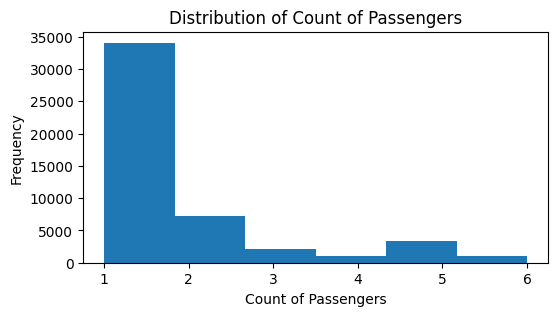

In [ ]:
# Distribution of count of passengers
plt.figure(figsize=(6,3))
plt.hist(df['no_of_passenger'], bins=6)
plt.xlabel('Count of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Count of Passengers')
plt.show()

In [ ]:
# this code creates an interactive scatter plot on a Mapbox map using Plotly Express, where each scatter point is located based on latitude and longitude coordinates.
# The size and color of the scatter points are determined by the 'amount' column from the DataFrame. When hovering over a point, the 'amount' value is displayed as a tooltip.
# The map is initially centered and zoomed based on the specified latitude and longitude coordinates

import plotly.express as px

tDropoff_fig = px.scatter_mapbox(df, lat='latitude_of_dropoff', lon='longitude_of_dropoff', hover_name='amount', hover_data=['amount'],
    color='amount',color_continuous_scale=px.colors.sequential.Rainbow_r, opacity=0.1,
    center={'lat': 40.75, 'lon': 286.051},
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tDropoff_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tDropoff_fig.show()

In [ ]:
# this code calculates the Haversine distance between pickup and dropoff locations for each row in a DataFrame and creates a new DataFrame containing relevant information.
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = np.sin(d_lat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    distance = r * c
    return distance

df['distance'] = haversine_distance(df['latitude_of_pickup'], df['longitude_of_pickup'],
                                    df['latitude_of_dropoff'], df['longitude_of_dropoff'])
df['distance'] = df['distance'].round(2)
new_df = df.loc[:, ['distance', 'amount', 'no_of_passenger','year','weekday','hour']]

In [ ]:
new_df.head()

,distance,amount,no_of_passenger,year,weekday,hour
0,1.03,4.5,1.0,2009,0,17
1,8.45,16.9,1.0,2010,1,16
2,1.39,5.7,2.0,2011,3,0
3,2.80,7.7,1.0,2012,5,4
4,2.00,5.3,1.0,2010,1,7


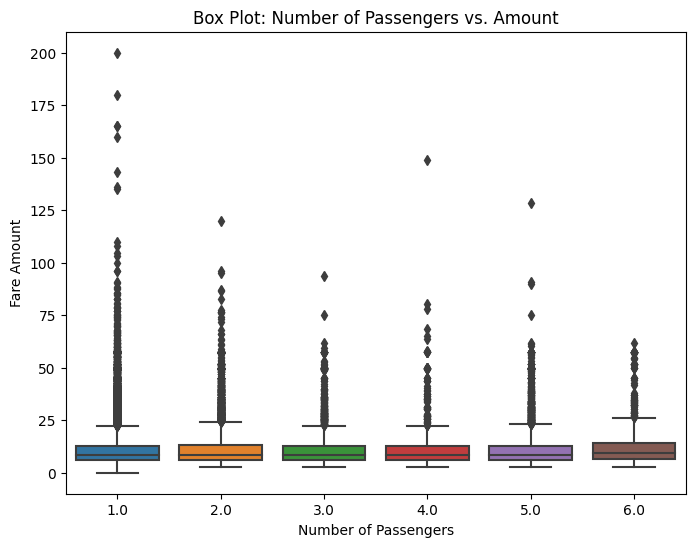

In [ ]:
# The box plot visually represents the distribution of fare amounts for different numbers of passengers
plt.figure(figsize=(8, 6))
sns.boxplot(x='no_of_passenger', y='amount', data=df)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.title('Box Plot: Number of Passengers vs. Amount')
plt.show()

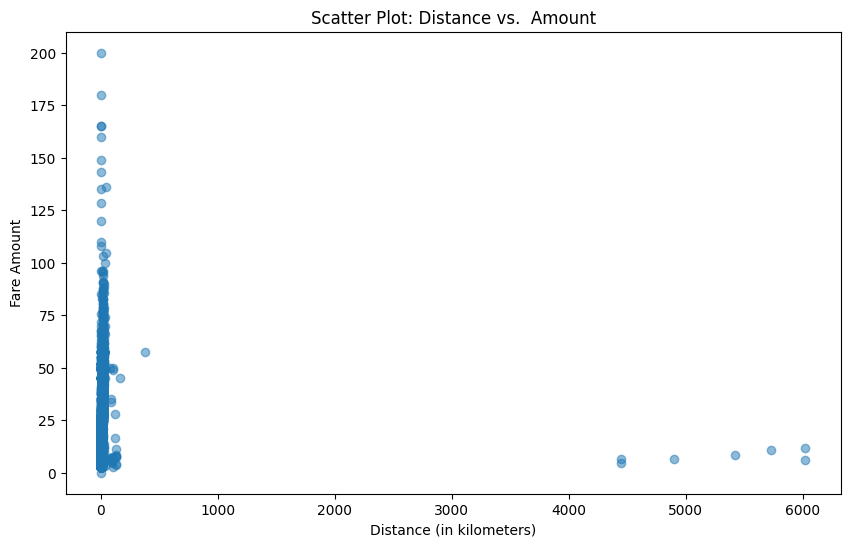

In [ ]:
# scatter plot using the 'distance' column as the x-axis and the 'amount' column as the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['amount'], alpha=0.5)
plt.xlabel('Distance (in kilometers)')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot: Distance vs.  Amount')
plt.show()

In [ ]:
# dividing the data in "X" and "y"
X = new_df[['year', 'hour', 'distance', 'no_of_passenger']]
y = new_df[['amount']]

# spliting the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train = y_train['amount'].values
y_test = y_test['amount'].values

# evaluating the models
def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")


**Linear Regression model**

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_train_pred_linear = linear_regressor.predict(X_train)
y_test_pred_linear = linear_regressor.predict(X_test)
evaluate_model(y_train, y_train_pred_linear, "Linear Regression (Train)")
evaluate_model(y_test, y_test_pred_linear, "Linear Regression (Test)")

Linear Regression (Train) Results:
RMSE: 9.50
MAE: 5.92
R-squared: 0.02
Linear Regression (Test) Results:
RMSE: 9.77
MAE: 5.99
R-squared: 0.02


**Decision Tree Regression model**

In [ ]:
param_grid = {'max_depth': [None, 5, 10, 20, 30]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
decision_tree_regressor_tuned = DecisionTreeRegressor(max_depth=best_params['max_depth'])
decision_tree_regressor_tuned.fit(X_train, y_train)
y_train_pred_tuned = decision_tree_regressor_tuned.predict(X_train)
y_test_pred_tuned = decision_tree_regressor_tuned.predict(X_test)
evaluate_model(y_train, y_train_pred_tuned, "Tuned Decision Tree Regression (Train)")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Decision Tree Regression (Test)")

Best Parameters: {'max_depth': 5}
Tuned Decision Tree Regression (Train) Results:
RMSE: 4.61
MAE: 2.30
R-squared: 0.77
Tuned Decision Tree Regression (Test) Results:
RMSE: 5.10
MAE: 2.37
R-squared: 0.73


**AdaBoost Regression model**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
param_grid = {'n_estimators': [50, 100, 150, 200]}
grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
adaboost_regressor_tuned = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=best_params['n_estimators'])
adaboost_regressor_tuned.fit(X_train, y_train)
y_train_pred_tuned = adaboost_regressor_tuned.predict(X_train)
y_test_pred_tuned = adaboost_regressor_tuned.predict(X_test)
evaluate_model(y_train, y_train_pred_tuned, "Tuned AdaBoost Regression (Train)")
evaluate_model(y_test, y_test_pred_tuned, "Tuned AdaBoost Regression (Test)")

Best Parameters: {'n_estimators': 100}
Tuned AdaBoost Regression (Train) Results:
RMSE: 2.14
MAE: 0.62
R-squared: 0.95
Tuned AdaBoost Regression (Test) Results:
RMSE: 6.11
MAE: 2.66
R-squared: 0.62


**Random Forest Regression model**

In [ ]:
param_grid = {'n_estimators': [50, 100, 150, 200]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
random_forest_regressor_tuned = RandomForestRegressor(n_estimators=best_params['n_estimators'])
random_forest_regressor_tuned.fit(X_train, y_train)
y_train_pred_tuned = random_forest_regressor_tuned.predict(X_train)
y_test_pred_tuned = random_forest_regressor_tuned.predict(X_test)
evaluate_model(y_train, y_train_pred_tuned, "Tuned Random Forest Regression (Train)")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Random Forest Regression (Test)")

Best Parameters: {'n_estimators': 150}
Tuned Random Forest Regression (Train) Results:
RMSE: 2.36
MAE: 1.03
R-squared: 0.94
Tuned Random Forest Regression (Test) Results:
RMSE: 5.51
MAE: 2.52
R-squared: 0.69


**Decision Tree Regression:**-->

---
*Training RMSE:* 4.61, *Testing RMSE:* 5.10
*Training MAE:* 2.30, *Testing MAE:* 2.37
*Training R-squared:* 0.77, *Testing R-squared:* 0.73

Decision trees have a tendency to overfit to the training data, which means they may perform very well on the training set but generalize poorly to unseen data (testing set). In this case, the Decision Tree Regression model seems to be slightly overfitting, as the difference between the training and testing RMSE and MAE is relatively high.

**Random Forest Regression:**-->

---
*Training RMSE*: 2.37, *Testing RMSE:* 5.33
*Training MAE:* 1.04, *Testing MAE:* 2.53
*Training R-squared:* 0.94, *Testing R-squared:* 0.69

Random Forest Regression is an ensemble method that builds multiple decision trees and averages their predictions, which helps to reduce overfitting. It performs better on the testing set compared to Decision Tree Regression, which indicates better generalization to unseen data. The Random Forest model strikes a better balance between bias and variance, resulting in improved performance on the testing set.

---
Therefore **while Decision Tree Regression is a good model, Random Forest Regression provides more robust and accurate predictions on unseen data due to its ensemble approach, making it the preferred choice for this dataset.**

---



In [ ]:
# predictiing amont for a new value using RANDOM FOREST REGRESSION TRAINED MODEL
new_input = pd.DataFrame({
    'year': [2013],
    'hour': [23],
    'distance': [4.94],
    'no_of_passenger': [1.0]
})

predicted_amount_rf = random_forest_regressor_tuned.predict(new_input)
print("Predicted Amount:", predicted_amount_rf)

Predicted Amount: [15.99498333]



---
# -By DHRUV SHETH

---



